## Read from a database

- Python as the "glue that binds" (_interoperability_)
- Work programatically with _metadata_ 

In [1]:
# There's a package for that!
import sqlite3
import pandas as pd
import seaborn as sns
import os

In [2]:
# Is this a file?
os.path.isfile('lahman.sqlite')

True

In [3]:
# Connect to the database
con = sqlite3.connect('lahman.sqlite')

In [4]:
# Write tables out to a DataFrame
table_query = "SELECT name FROM sqlite_master WHERE type='table';"

Want a static list of all tables in a database? 
Good luck doing this with a BI tool!

In [5]:
list_tables = pd.read_sql_query(table_query, con)
list_tables.head()

name
0          allstarfull
1          appearances
2       awardsmanagers
3        awardsplayers
4  awardssharemanagers

## Payroll analysis

The `salary` table has MLB salaries since 1985. 

We will use basic SQL to communicate with the database. 

In [6]:
salary_query = 'SELECT * FROM salaries;'
salaries = pd.read_sql_query(salary_query, con)
salaries.head()

ID  yearID teamID  team_ID lgID   playerID    salary
0   1    1985    ATL     1918   NL  barkele01  870000.0
1   2    1985    ATL     1918   NL  bedrost01  550000.0
2   3    1985    ATL     1918   NL  benedbr01  545000.0
3   4    1985    ATL     1918   NL   campri01  633333.0
4   5    1985    ATL     1918   NL  ceronri01  625000.0

But who are these players and teams? Let's merge in that information from other tables... this is a lot like `VLOOKUP()`... 

In [7]:
# Who are these players?
# Let's find out from the people table
people_query = 'SELECT * FROM people;'

## The `people` table

This table contains information about every person included in the baseball records (players, managers, etc.). 

In [8]:
people = pd.read_sql_query(people_query, con)
people.head()

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay  ... bats throws       debut  \
0      Denver        NaN         NaN       NaN  ...    R      R  2004-04-06   
1      Mobile        NaN         NaN       NaN  ...    R      R  1954-04-13   
2      Mobile     1984.0         8.0      16.0  ...    R      R  1962-04-10   
3      Orange        NaN         NaN       NaN  ...    R      R  1977-07-26   
4  Palm Beach        NaN         NaN       NaN  ...    L      L  2001-09-10   

    finalGame   retroID    bbrefID  birth_date  debut_date finalgame_date  \
0  2015-08-23  aardd001  aardsda01  1981-12-27  2004-04-06     2015-08-23   
1  1976-10-03  aaroh101  aaronha01  1934-02-05  1954-04-13     1976-10-03   
2  1971-09-26  aarot101  aaronto01  1939-08-05  1962-04-10     1971-09-26   
3  1990-10-03  aased001   aasedo01  1954-09-08  1977-07-26     1990-10-03   
4  2006-04-13  abada001   abadan01  1972-08-25  2001-09-10     2006-04-13   

   death_date  
0        None  
1        None  
2  1984-08-16  
3        None  
4        None  

[5 rows x 28 columns]

There are _lots_ of ways to size up a dataset in Python. 

In [9]:
# Why do some of these columns have more nulls than others? 
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerID        19878 non-null  object 
 1   birthYear       19763 non-null  float64
 2   birthMonth      19594 non-null  float64
 3   birthDay        19452 non-null  float64
 4   birthCountry    19816 non-null  object 
 5   birthState      19340 non-null  object 
 6   birthCity       19704 non-null  object 
 7   deathYear       9757 non-null   float64
 8   deathMonth      9756 non-null   float64
 9   deathDay        9755 non-null   float64
 10  deathCountry    9755 non-null   object 
 11  deathState      9706 non-null   object 
 12  deathCity       9750 non-null   object 
 13  nameFirst       19841 non-null  object 
 14  nameLast        19878 non-null  object 
 15  nameGiven       19841 non-null  object 
 16  weight          19060 non-null  float64
 17  height          19141 non-null 

In [10]:
# What percent are each?
people.isnull().mean().sort_values(ascending=False)

deathState        0.511722
deathCity         0.509508
death_date        0.509256
deathDay          0.509256
deathCountry      0.509256
deathMonth        0.509206
deathYear         0.509156
bats              0.059513
throws            0.049150
weight            0.041151
height            0.037076
birthState        0.027065
birth_date        0.021431
birthDay          0.021431
birthMonth        0.014287
finalGame         0.009860
debut             0.009860
debut_date        0.009860
finalgame_date    0.009860
birthCity         0.008753
birthYear         0.005785
birthCountry      0.003119
retroID           0.002817
nameGiven         0.001861
nameFirst         0.001861
bbrefID           0.000101
playerID          0.000000
nameLast          0.000000
dtype: float64

In [11]:
# Describe the data
people.describe()

birthYear    birthMonth      birthDay    deathYear   deathMonth  \
count  19763.000000  19594.000000  19452.000000  9757.000000  9756.000000   
mean    1933.768304      6.627080     15.630681  1965.759250     6.491287   
std       42.485357      3.466562      8.757199    32.678973     3.532180   
min     1820.000000      1.000000      1.000000  1872.000000     1.000000   
25%     1896.000000      4.000000      8.000000  1943.000000     3.000000   
50%     1941.000000      7.000000     16.000000  1968.000000     6.000000   
75%     1972.000000     10.000000     23.000000  1993.000000    10.000000   
max     2000.000000     12.000000     31.000000  2020.000000    12.000000   

          deathDay        weight        height  
count  9755.000000  19060.000000  19141.000000  
mean     15.540543    187.167104     72.326629  
std       8.779454     21.944565      2.612004  
min       1.000000     65.000000     43.000000  
25%       8.000000    170.000000     71.000000  
50%      15.000000    185.000000     72.000000  
75%      23.000000    200.000000     74.000000  
max      31.000000    320.000000     83.000000

In [12]:
# Where did all the variables go?
people.describe(include='all')

playerID     birthYear    birthMonth      birthDay birthCountry  \
count       19878  19763.000000  19594.000000  19452.000000        19816   
unique      19878           NaN           NaN           NaN           57   
top     boskish01           NaN           NaN           NaN          USA   
freq            1           NaN           NaN           NaN        17254   
mean          NaN   1933.768304      6.627080     15.630681          NaN   
std           NaN     42.485357      3.466562      8.757199          NaN   
min           NaN   1820.000000      1.000000      1.000000          NaN   
25%           NaN   1896.000000      4.000000      8.000000          NaN   
50%           NaN   1941.000000      7.000000     16.000000          NaN   
75%           NaN   1972.000000     10.000000     23.000000          NaN   
max           NaN   2000.000000     12.000000     31.000000          NaN   

       birthState birthCity    deathYear   deathMonth     deathDay  ...  \
count       19340     19704  9757.000000  9756.000000  9755.000000  ...   
unique        290      4859          NaN          NaN          NaN  ...   
top            CA   Chicago          NaN          NaN          NaN  ...   
freq         2321       379          NaN          NaN          NaN  ...   
mean          NaN       NaN  1965.759250     6.491287    15.540543  ...   
std           NaN       NaN    32.678973     3.532180     8.779454  ...   
min           NaN       NaN  1872.000000     1.000000     1.000000  ...   
25%           NaN       NaN  1943.000000     3.000000     8.000000  ...   
50%           NaN       NaN  1968.000000     6.000000    15.000000  ...   
75%           NaN       NaN  1993.000000    10.000000    23.000000  ...   
max           NaN       NaN  2020.000000    12.000000    31.000000  ...   

         bats throws       debut   finalGame   retroID    bbrefID  birth_date  \
count   18695  18901       19682       19682     19822      19876       19452   
unique      3      3       10512        9444     19822      19876       15968   
top         R      R  1884-05-01  2019-09-29  dellw101  boskish01  1969-03-25   
freq    12288  15093          36         533         1          1           6   
mean      NaN    NaN         NaN         NaN       NaN        NaN         NaN   
std       NaN    NaN         NaN         NaN       NaN        NaN         NaN   
min       NaN    NaN         NaN         NaN       NaN        NaN         NaN   
25%       NaN    NaN         NaN         NaN       NaN        NaN         NaN   
50%       NaN    NaN         NaN         NaN       NaN        NaN         NaN   
75%       NaN    NaN         NaN         NaN       NaN        NaN         NaN   
max       NaN    NaN         NaN         NaN       NaN        NaN         NaN   

        debut_date finalgame_date  death_date  
count        19682          19682        9755  
unique       10512           9444        8736  
top     1884-05-01     2019-09-29  1984-12-20  
freq            36            533           4  
mean           NaN            NaN         NaN  
std            NaN            NaN         NaN  
min            NaN            NaN         NaN  
25%            NaN            NaN         NaN  
50%            NaN            NaN         NaN  
75%            NaN            NaN         NaN  
max            NaN            NaN         NaN  

[11 rows x 28 columns]

In [13]:
# What is the average player height?
people['height'].mean()

72.3266287027846

In [14]:
# What is the earliest birthyear on file?
### To be completed by learners ####

### What questions do you have about the data?

Data visualization is _not_ a separate or optional part of data analysis!

With the `seaborn` package we can use functions to build plots.

<AxesSubplot:xlabel='height', ylabel='weight'>

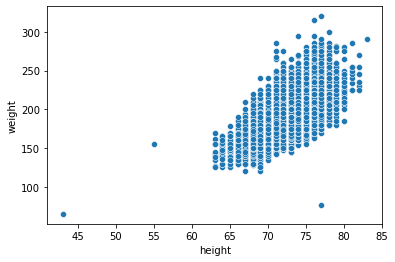

In [15]:
# Define x and y axes, and what dataset
sns.scatterplot(x='height', y='weight', data=people)

Who are the outliers? Let's take a look....

In [16]:
people.query('(height < 60) or (weight < 100)')

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
6065   gaedeed01     1925.0         6.0       8.0          USA         IL   
7637   healeto01     1853.0         NaN       NaN          USA         RI   
17038  stallja01     1989.0        12.0      22.0          USA         KS   

      birthCity  deathYear  deathMonth  deathDay  ...  bats throws  \
6065    Chicago     1961.0         6.0      18.0  ...     R      L   
7637   Cranston     1891.0         2.0       6.0  ...  None      R   
17038  Lawrence        NaN         NaN       NaN  ...     R      R   

            debut   finalGame   retroID    bbrefID  birth_date  debut_date  \
6065   1951-08-19  1951-08-19  gaede101  gaedeed01  1925-06-08  1951-08-19   
7637   1878-06-13  1878-09-09  healt101  healeto01        None  1878-06-13   
17038  2016-06-19  2019-09-29  stalj001  stallja01  1989-12-22  2016-06-19   

      finalgame_date  death_date  
6065      1951-08-19  1961-06-18  
7637      1878-09-09  1891-02-06  
17038     2019-09-29        None  

[3 rows x 28 columns]

<AxesSubplot:xlabel='height', ylabel='weight'>

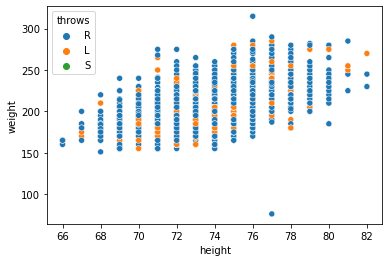

In [17]:
# Easily customizable plots...
sns.scatterplot(x='height', y='weight', hue='throws', data=people.query('birthYear > 1980'))

<AxesSubplot:xlabel='bats', ylabel='count'>

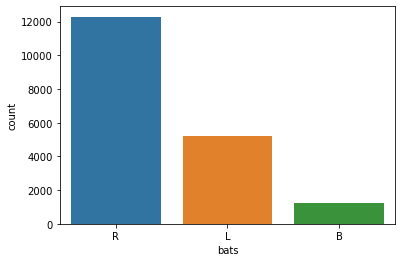

In [18]:
sns.countplot(x='bats', data=people)

In [19]:
# Create a countplot of number of records by "throws." Put "throws" on the y axis (flipped barchart)
### To be completed by learner###

### Time to roll out the big potatoes for data profiling...

In [20]:
from pandas_profiling import ProfileReport
ProfileReport(people)

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We are going to merge the information about player names with salary data for the next leg of our report...

In [21]:
# Grab the name and ID
people_names = people[['playerID', 'nameFirst', 'nameLast']]
people_names.head()

playerID nameFirst nameLast
0  aardsda01     David  Aardsma
1  aaronha01      Hank    Aaron
2  aaronto01    Tommie    Aaron
3   aasedo01       Don     Aase
4   abadan01      Andy     Abad

In [22]:
# Merge these datasets -- left outer join 
# (Like VLOOKUP)
salaries_merged = salaries.merge(people_names, how='left')
salaries_merged.shape

(26428, 9)

In [23]:
salaries.shape

(26428, 7)

In [24]:
salaries_merged.head()

ID  yearID teamID  team_ID lgID   playerID    salary nameFirst   nameLast
0   1    1985    ATL     1918   NL  barkele01  870000.0       Len     Barker
1   2    1985    ATL     1918   NL  bedrost01  550000.0     Steve  Bedrosian
2   3    1985    ATL     1918   NL  benedbr01  545000.0     Bruce   Benedict
3   4    1985    ATL     1918   NL   campri01  633333.0      Rick       Camp
4   5    1985    ATL     1918   NL  ceronri01  625000.0      Rick     Cerone

Let's do some more plotting...

<AxesSubplot:xlabel='yearID', ylabel='salary'>

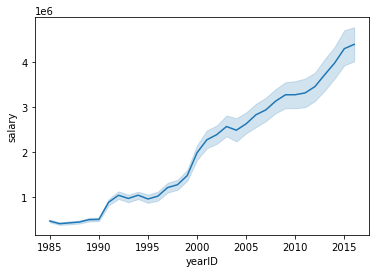

In [25]:
sns.lineplot(x='yearID', y='salary', data=salaries_merged)

<AxesSubplot:xlabel='yearID', ylabel='salary'>

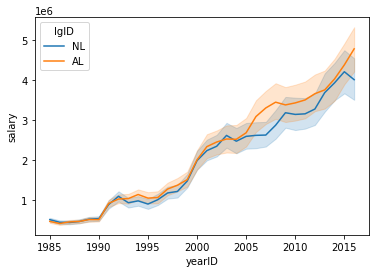

In [26]:
sns.lineplot(x='yearID', y='salary', hue='lgID', data=salaries_merged)

Want to facet these (small multiples)? No problem... in Python! (This can get hairy in Excel)

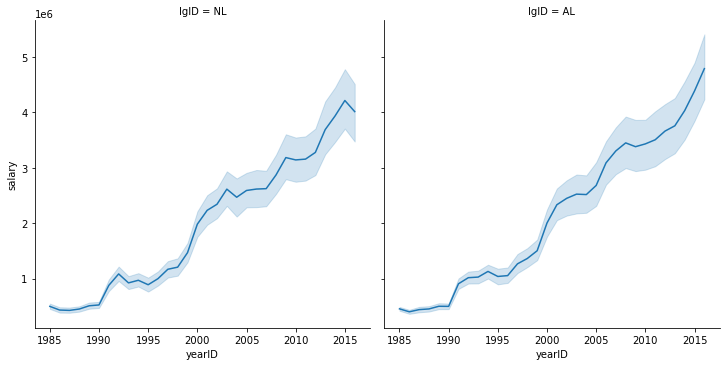

In [27]:
sns.relplot(data=salaries_merged, x='yearID', y='salary', col='lgID', kind='line')

## What questions do you have so far? 

### Messy data  

What is the _total_ annual salary for each player?

A player can play for more than one team in a year, so we need to aggregate the records (think PivotTables)...

In [28]:
# Total annual salary
player_salaries = salaries_merged[['playerID', 'nameFirst', 'nameLast', 'yearID', 'salary']]
annual_salaries = player_salaries.groupby(['playerID','nameFirst','nameLast','yearID'], as_index=False).sum('salary')
annual_salaries.head()

playerID nameFirst nameLast  yearID     salary
0  aardsda01     David  Aardsma    2004   300000.0
1  aardsda01     David  Aardsma    2007   387500.0
2  aardsda01     David  Aardsma    2008   403250.0
3  aardsda01     David  Aardsma    2009   419000.0
4  aardsda01     David  Aardsma    2010  2750000.0

What are the most expensive season salaries ever?

In [29]:
top_salaries = player_salaries.nlargest(10, 'salary')
top_salaries.sort_values(by='salary', inplace=True, ascending=False)
top_salaries

playerID nameFirst   nameLast  yearID      salary
20286  rodrial01      Alex  Rodriguez    2009  33000000.0
21109  rodrial01      Alex  Rodriguez    2010  33000000.0
25965  kershcl01   Clayton    Kershaw    2016  33000000.0
25131  kershcl01   Clayton    Kershaw    2015  32571000.0
21945  rodrial01      Alex  Rodriguez    2011  32000000.0
25588  greinza01      Zack    Greinke    2016  31799030.0
22793  rodrial01      Alex  Rodriguez    2012  30000000.0
25673  priceda01     David      Price    2016  30000000.0
23616  rodrial01      Alex  Rodriguez    2013  29000000.0
19461  rodrial01      Alex  Rodriguez    2008  28000000.0

## Payroll versus attendance

Is there a relationship? Let's read in the `teams` data to find out...

In [30]:
teams_all_query = 'SELECT * FROM teams;'
teams_all = pd.read_sql_query(teams_all_query, con)
teams_all.head()

ID  yearID lgID teamID franchID divID  div_ID  teamRank   G  Ghome  ...  \
0   1    1871   NA    BS1      BNA  None     NaN         3  31    NaN  ...   
1   2    1871   NA    CH1      CNA  None     NaN         2  28    NaN  ...   
2   3    1871   NA    CL1      CFC  None     NaN         8  29    NaN  ...   
3   4    1871   NA    FW1      KEK  None     NaN         7  19    NaN  ...   
4   5    1871   NA    NY2      NNA  None     NaN         5  33    NaN  ...   

   DP     FP                     name                          park  \
0  24  0.834     Boston Red Stockings           South End Grounds I   
1  16  0.829  Chicago White Stockings       Union Base-Ball Grounds   
2  15  0.818   Cleveland Forest Citys  National Association Grounds   
3   8  0.803     Fort Wayne Kekiongas                Hamilton Field   
4  14  0.840         New York Mutuals      Union Grounds (Brooklyn)   

  attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0        NaN  103   98       BOS             BS1          BS1  
1        NaN  104  102       CHI             CH1          CH1  
2        NaN   96  100       CLE             CL1          CL1  
3        NaN  101  107       KEK             FW1          FW1  
4        NaN   90   88       NYU             NY2          NY2  

[5 rows x 50 columns]

In [31]:
# Which columns do we want to keep? Let's get their names.
teams_all.columns

Index(['ID', 'yearID', 'lgID', 'teamID', 'franchID', 'divID', 'div_ID',
       'teamRank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin',
       'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF',
       'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF',
       'teamIDBR', 'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [32]:
# Group salaries by team this time -- that is our unit of analysis
payroll = salaries.groupby(['yearID', 'teamID'], as_index=False).sum('salary')
payroll.head()

yearID teamID    ID  team_ID      salary
0    1985    ATL   253    42196  14807000.0
1    1985    BAL   737    42218  11560712.0
2    1985    BOS  1425    48000  10897560.0
3    1985    CAL  2338    53788  14427894.0
4    1985    CHA  2268    40362   9846178.0

In [33]:
# Merge with select columns of teams
payroll_merged = teams_all[['yearID','teamID','name','attendance', 'W']].merge(payroll, how='right')
payroll_merged.head()

yearID teamID               name  attendance   W    ID  team_ID      salary
0    1985    ATL     Atlanta Braves   1350137.0  66   253    42196  14807000.0
1    1985    BAL  Baltimore Orioles   2132387.0  83   737    42218  11560712.0
2    1985    BOS     Boston Red Sox   1786633.0  81  1425    48000  10897560.0
3    1985    CAL  California Angels   2567427.0  90  2338    53788  14427894.0
4    1985    CHA  Chicago White Sox   1669888.0  85  2268    40362   9846178.0

In [34]:
# Did we lose any data? 
payroll_merged['salary'].sum() == payroll['salary'].sum()

True

<AxesSubplot:xlabel='salary', ylabel='attendance'>

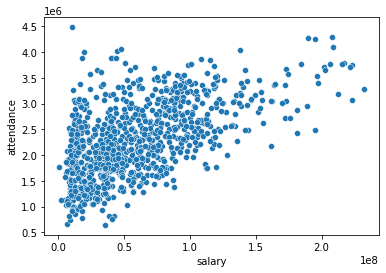

In [35]:
sns.scatterplot(x='salary', y='attendance', data=payroll_merged)

<AxesSubplot:xlabel='salary', ylabel='attendance'>

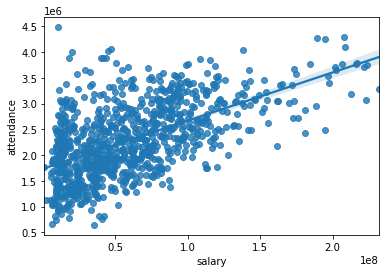

In [36]:
# Is there a relationship? 
sns.regplot(x='salary', y='attendance', data=payroll_merged)

We can try taking the log of salaries to subdue the extreme values...

In [37]:
# Numeric computing
import numpy as np
payroll_merged['salary_log'] = np.log(payroll_merged['salary'])
payroll_merged['salary_log'].head()

0    16.510611
1    16.263123
2    16.204049
3    16.484674
4    16.102594
Name: salary_log, dtype: float64

<AxesSubplot:xlabel='salary_log', ylabel='attendance'>

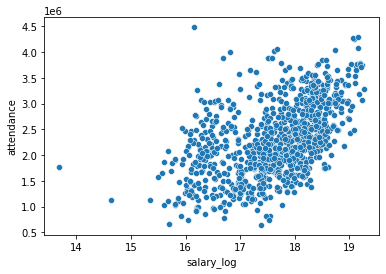

In [38]:
sns.scatterplot(x='salary_log', y='attendance', data=payroll_merged)

In [39]:
# Can you rerun the regplot?
### To be completed by learner ###

### What are we _not_ considering with this relationship?

- Should we [adjust for inflation](https://medium.com/@alvaro.henriquez/adjusting-for-inflation-in-pandas-9cffc0d888ac)?
- Should we [adjust for population from the census](https://towardsdatascience.com/accessing-census-data-with-python-3e2f2b56e20d)?

What else could be contributing to or skewing this relationship?

Is there a relationship between payroll and winas?

<AxesSubplot:xlabel='salary_log', ylabel='W'>

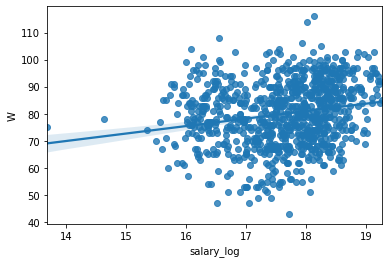

In [40]:
sns.regplot(x='salary_log', y='W', data=payroll_merged)

 ## Creating a Python-Powered Excel report
 
For better or worse, not everyone you'll likely work with will be fluent in Python! So let's look at creating a polished team payroll report in Excel using just Python. We will make use of the `xlsxwriter` package to do this.

In [41]:
# Focus on one team for now... 
reds_payroll = payroll_merged.query('name == "Cincinnati Reds"')[['yearID','attendance','W','salary']]
reds_payroll.head()

yearID  attendance   W      salary
6      1985   1834619.0  89   8359917.0
32     1986   1692432.0  86  11906388.0
58     1987   2185205.0  84   9281500.0
84     1988   2072528.0  87   8888409.0
110    1989   1979320.0  75  11072000.0

In [42]:
# Rename all the columns at once... another nice Python win
reds_payroll.columns = ['year', 'attendance', 'wins', 'salary']
reds_payroll.head()

year  attendance  wins      salary
6    1985   1834619.0    89   8359917.0
32   1986   1692432.0    86  11906388.0
58   1987   2185205.0    84   9281500.0
84   1988   2072528.0    87   8888409.0
110  1989   1979320.0    75  11072000.0

Now we will write the data out to Excel, format it and add a chart.

In [43]:
import xlsxwriter 

# 1. Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('payroll.xlsx', engine='xlsxwriter')

# 2. Convert the dataframe to an XlsxWriter Excel object
reds_payroll.to_excel(writer, sheet_name='Sheet1', index=False)

# 3. Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Add number and currency formats to columns B and D:
thousands_format = workbook.add_format({'num_format':'#,##0'})
currency_format = currency_format = workbook.add_format({'num_format':'$#,##0'})

# None is an unused argument for column width
worksheet.set_column('B:B', 10, thousands_format)
worksheet.set_column('D:D', 12, currency_format)

0

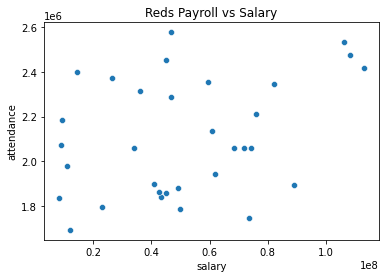

In [44]:
# Now let's add the chart...

import matplotlib.pyplot as plt  # Add chart title

sns.scatterplot(x='salary', y='attendance', data=reds_payroll)
plt.title('Reds Payroll vs Salary')

# Save the image
plt.savefig('payroll.png', dpi = (300))

# Add the image to the workbook
worksheet.insert_image('G1', 'payroll.png')

# Close workbook
workbook.close()

## What questions do you have about Python?